In [233]:
%pylab inline
rcParams['figure.figsize'] = [16, 3]
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [234]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [236]:
df = pd.read_csv('data/sample1.csv', parse_dates=True, index_col=0)
df

,Counter
Date,
2014-08-31 15:15:00,800
2014-08-31 15:30:00,685
2014-08-31 15:45:00,642
2014-08-31 16:00:00,637
2014-08-31 16:15:00,648
2014-08-31 16:30:00,802
2014-08-31 16:45:00,804
2014-08-31 17:00:00,814
2014-08-31 17:15:00,646


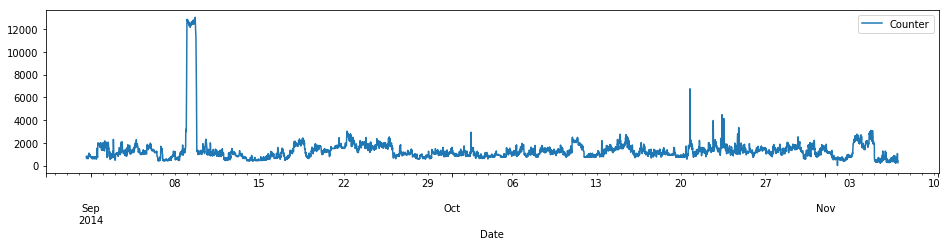

In [237]:
df.plot()

In [238]:
from datetime import timedelta
from datetime import datetime

In [239]:
exception_deviation = 1000
exception_window_size = 100
compression_deviation = exception_deviation / 2
compression_window_size = 100

In [242]:
snapshot_time = df.index[0]
snapshot_value = data[0]

exception = []

exception_window_counter = 0

for index in range(len(data)):
    if index == 0:
        continue
    if abs(snapshot_value - data[index]) > exception_deviation:
        exception.append([df.index[index], data[index]])
        exception_window_counter = 0
    else:
        exception_window_counter = (exception_window_counter + 1) % exception_window_size
        
        if exception_window_counter == 0:
            exception.append([df.index[index], data[index]])
    
    if exception_window_counter == 0:
        snapshot_time = df.index[index]
        snapshot_value = data[index]
exception

df.index[72]

Timestamp('2014-09-01 09:00:00')

In [217]:
print("{} {}".format((len(data) - len(exception)), "number of data points discarded as part of exception window"))


6359 number of data points discarded as part of exception window


In [218]:
exception_df = pd.DataFrame(exception, columns=['Date', 'Counter'])
exception_df.set_index('Date', inplace=True)

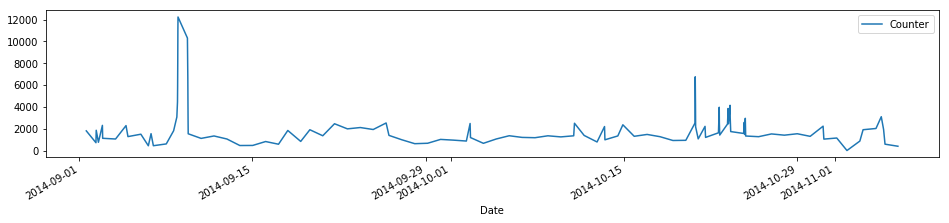

In [219]:
exception_df.plot()

In [220]:
snapshot_time = exception_df.index[0]
snapshot_value = exception_df['Counter'][0]

slope_max = +inf
slope_min = -inf

compression = []

compression_window_counter = 0

for index in range(len(exception_df['Counter'])):
    if index == 0:
        continue
    
    curr_slope_max = (exception_df['Counter'][index] + compression_deviation - snapshot_value) / (exception_df.index[index] - snapshot_time).total_seconds()
    curr_slope_min = (exception_df['Counter'][index] - compression_deviation - snapshot_value) / (exception_df.index[index] - snapshot_time).total_seconds()

    if curr_slope_max < slope_min or curr_slope_min > slope_max:
        compression.append([exception_df.index[index], exception_df['Counter'][index]])
        compression_window_counter = 0
    else:
        slope_max = min(slope_max, curr_slope_max)
        slope_min = max(slope_min, curr_slope_min)
        
        compression_window_counter = (compression_window_counter + 1) % compression_window_size

        if compression_window_counter == 0:
            compression.append([exception_df.index[index], exception_df['Counter'][index]])
            
    if compression_window_counter == 0:
        snapshot_time = exception_df.index[0]
        snapshot_value = exception_df['Counter'][0]

        slope_max = +inf
        slope_min = -inf
                
compression

[[Timestamp('2014-09-02 09:15:00'), 1857],
 [Timestamp('2014-09-02 21:15:00'), 2305],
 [Timestamp('2014-09-04 19:00:00'), 2284],
 [Timestamp('2014-09-06 19:30:00'), 1545],
 [Timestamp('2014-09-08 15:15:00'), 1812],
 [Timestamp('2014-09-08 22:45:00'), 4451],
 [Timestamp('2014-09-08 23:15:00'), 8046],
 [Timestamp('2014-09-08 23:45:00'), 12238],
 [Timestamp('2014-09-09 18:15:00'), 9115],
 [Timestamp('2014-09-09 18:45:00'), 6732],
 [Timestamp('2014-09-09 19:15:00'), 2810],
 [Timestamp('2014-09-17 20:30:00'), 1838],
 [Timestamp('2014-09-19 15:15:00'), 1905],
 [Timestamp('2014-09-21 15:00:00'), 2455],
 [Timestamp('2014-09-26 00:30:00'), 1388],
 [Timestamp('2014-10-02 13:45:00'), 2478],
 [Timestamp('2014-10-11 00:00:00'), 2500],
 [Timestamp('2014-10-13 10:15:00'), 2198],
 [Timestamp('2014-10-14 21:45:00'), 2358],
 [Timestamp('2014-10-20 17:45:00'), 2537],
 [Timestamp('2014-10-20 18:30:00'), 4103],
 [Timestamp('2014-10-20 23:45:00'), 1068],
 [Timestamp('2014-10-21 14:00:00'), 1202],
 [Timestam

In [221]:
print("{} {}".format((len(exception) - len(compression)), "number of data points discarded as part of exception window"))


76 number of data points discarded as part of exception window


In [222]:
compression_df = pd.DataFrame(compression, columns=['Date', 'Counter'])
compression_df.set_index('Date', inplace=True)

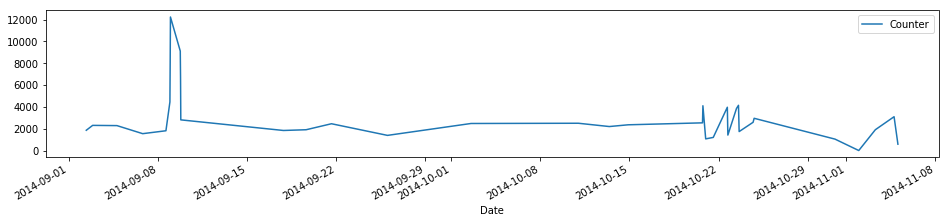

In [224]:
compression_df.plot()